In [76]:
%pylab inline

import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/validation_one_opt/plot_sep/'

Populating the interactive namespace from numpy and matplotlib


In [77]:
# PLot validation of one optimal allele with error bars showing +/- 1 std away from the mean

def main():
    
    means = [10**-5, 10**-4, 10**-3, 10**-2]
    pers = [2,3,4]
    opt_dic = {}
    opt_dic[2] = [11,14,17,20]
    opt_dic[3] = [8,10,12]
    opt_dic[4] = [7,8,9,10]
    folder = 't7'
    fig_num = 0

    # One plot for each optimal allele
    for per in pers:
        opt_list = opt_dic[per]
        
        for opt in opt_list:
            list_of_s = []
            errors = []
            legend_labels = []
            
            for mean in means:
                
                for j in range(0,3): # There are 3 k, theta pairs for each s value

                    file_list = glob.glob('./results/validation_multiple_one_opt/%s/per_%d_opt_%d_*_%.5f.txt'%(folder, per, opt, mean)) # narrow_prior 
                    file_list.sort()
                        
                    filename = file_list[j]
                        
                    # Read in information from file
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    list_of_s.append(est_mean)
                    line = lines[5]       
                    info = line.strip().split(': ')
                    stdev = float(info[1])
                    line = lines[1]
                    info = line.strip().split(' ')
                    k = float(info[7])
                    theta = float(info[10])
                    
                    legend_labels.append('(%.1E,%.1E)'%(k,theta))
                    
                    errors.append(stdev)
                
            fig_num = fig_num + 1
            plt.figure(fig_num, figsize=(12, 6))
            y_pos = np.arange(len(legend_labels))
            
            # Plot each s value
            plt.errorbar(y_pos[0:3], list_of_s[0:3], yerr=errors[0:3], marker = 'o', ls = '--', c='red') 
            plt.errorbar(y_pos[3:6], list_of_s[3:6], yerr=errors[3:6], marker = 'o', ls = '--', c='red') 
            plt.errorbar(y_pos[6:9], list_of_s[6:9], yerr=errors[6:9], marker = 'o', ls = '--', c='red') 
            plt.errorbar(y_pos[9:12], list_of_s[9:12], yerr=errors[9:12], marker = 'o', ls = '--', c='red') 
            plt.xticks(y_pos[0:12], legend_labels[0:12], rotation = 35) 
            plt.yscale('log')
            plt.ylabel("Estimated s")
            
            # Plot dash lines separating each s value
            plt.axvline(x=2.5, linestyle = '--')
            plt.axvline(x=5.5, linestyle = '--')
            plt.axvline(x=8.5, linestyle = '--')
            
            # Label each column with s value
            plt.text(0.7,10**-7.3,r'$s=10^{-5}$')
            plt.text(3.7,10**-7.3,r'$s=10^{-4}$')
            plt.text(6.7,10**-7.3,r'$s=10^{-3}$')
            plt.text(9.7,10**-7.3,r'$s=10^{-2}$')
            plt.ylim(10**-6, 10**-1)
            plt.title('Joint method validation: Period %d opt %d\nMean +/- 1 st dev of 20 median estimates'%(per, opt))
            plt.savefig(PLOTDIR + '%s/per_%d_opt_%d.pdf'%(folder,per,opt),bbox_inches='tight')
            plt.show()

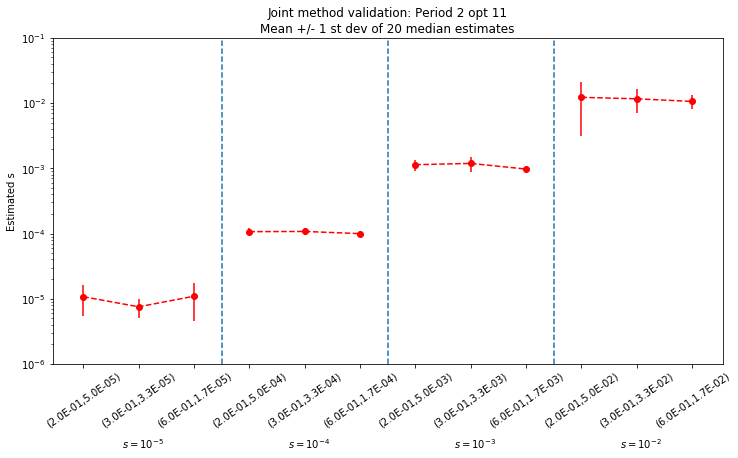

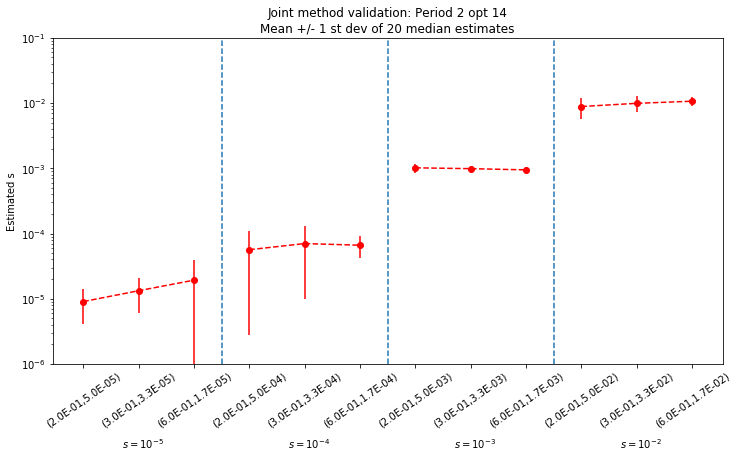

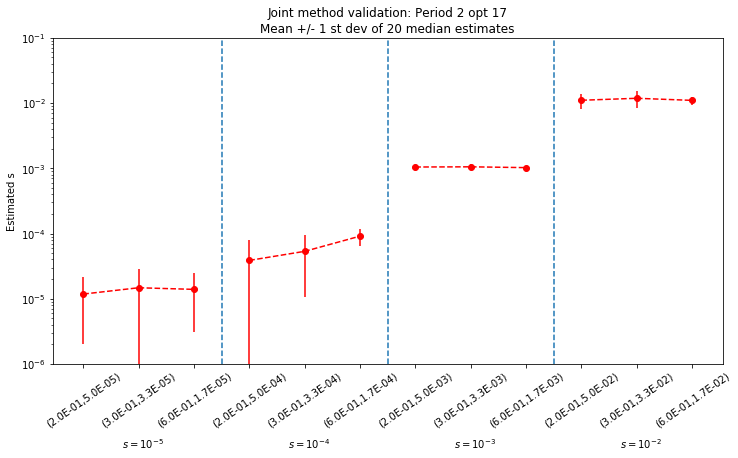

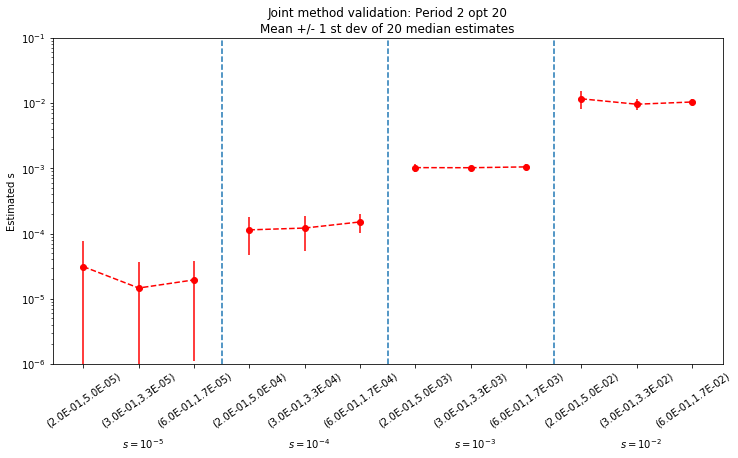

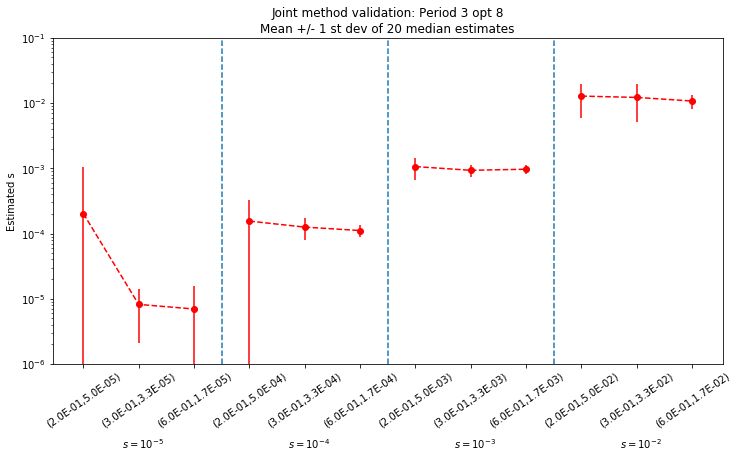

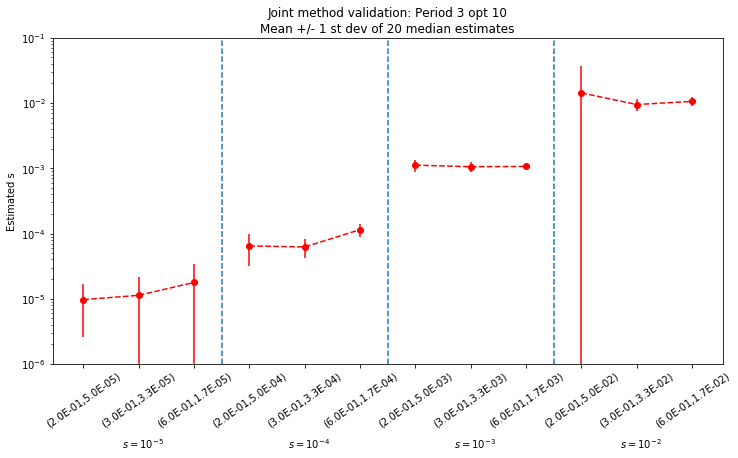

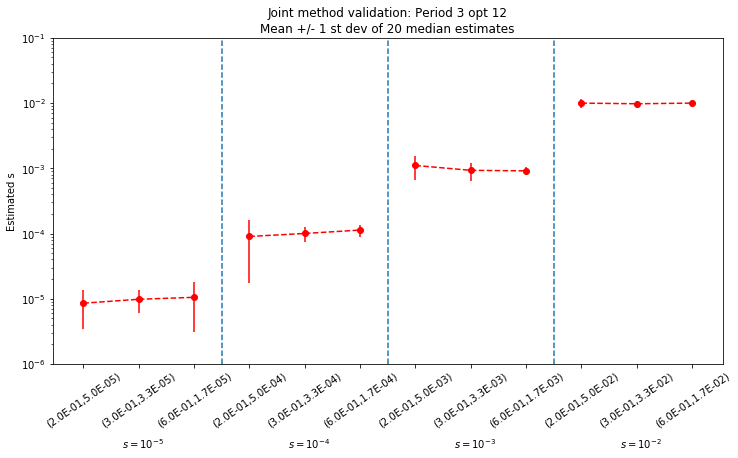

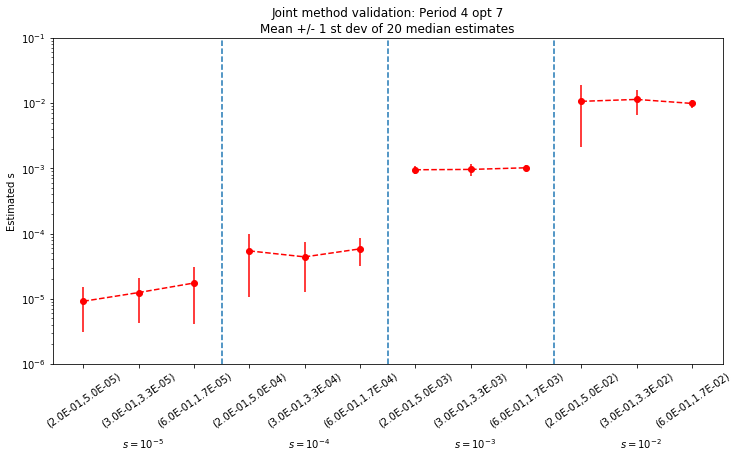

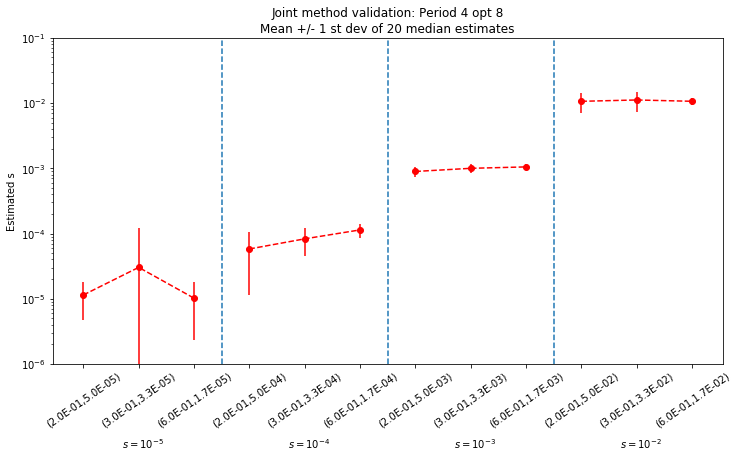

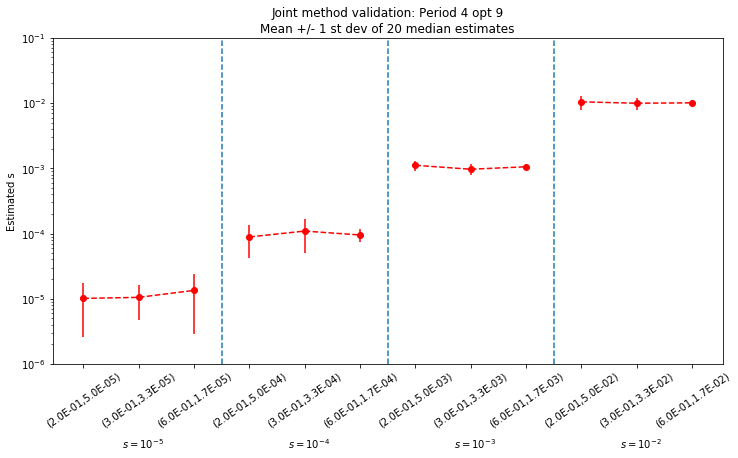

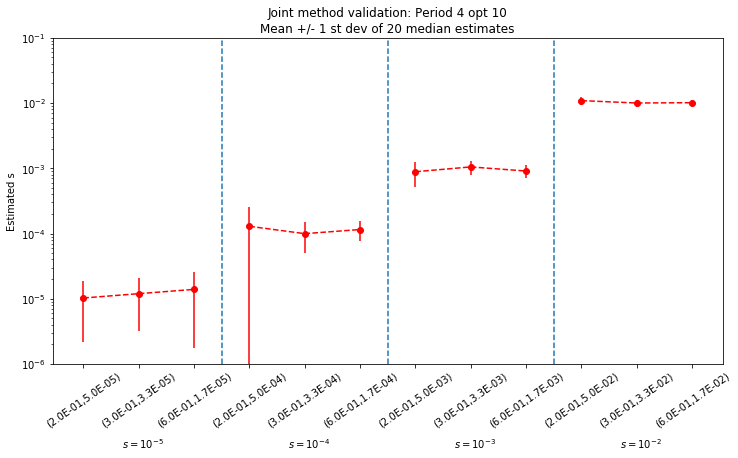

CPU times: user 17.3 s, sys: 225 ms, total: 17.5 s
Wall time: 17.5 s


In [78]:
%%time
if __name__ == '__main__':
    main()